In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 




train_df = pd.read_csv('mask-total.csv', sep=',')
train_df.head()

,colct_stdde,sle_site_domn,prices_prdlst_id,goods_nm,shop_nm,anals_trget_pc,Price,expsr_ordr,job_id,kf,Rand
0,2020-05-25,search.shopping.naver.com,F012050,끈조절 가능 뉴네퓨어 황사방역 마스크 KF94 대형 소형 마스크 - 내니클린,내니클린,2900,2900.0,10.0,490001,94,0.000070
1,2020-05-12,search.shopping.naver.com,F012050,건영크린텍 10매건영 KF94 미세먼지 마스크 대형 white 5매입2 - G마켓,G마켓,29000,2900.0,80.0,490015,94,0.000081
2,2020-05-28,search.shopping.naver.com,F012050,[네퓨어] 파인텍 네퓨어 KF94 대형(5매입x1개) 황사 미세먼지 끈조절 마스크 ...,위메프,13000,2600.0,37.0,490008,94,0.000090
3,2020-04-17,search.shopping.naver.com,F012050,국산 kf80 마스크 대형 - 도그몰,도그몰,3000,3000.0,29.0,490013,80,0.000103
4,2020-03-28,search.shopping.naver.com,F012050,KF94 마스크 5매 대형/소형/성인/어린이 쉐도우 문 미세먼지 마스크 제로베이 도...,폴보스티몰,19500,3900.0,21.0,490001,94,0.000310


In [2]:
train_df=train_df.loc[:,['goods_nm','kf']]
train_df.head()

,goods_nm,kf
0,끈조절 가능 뉴네퓨어 황사방역 마스크 KF94 대형 소형 마스크 - 내니클린,94
1,건영크린텍 10매건영 KF94 미세먼지 마스크 대형 white 5매입2 - G마켓,94
2,[네퓨어] 파인텍 네퓨어 KF94 대형(5매입x1개) 황사 미세먼지 끈조절 마스크 ...,94
3,국산 kf80 마스크 대형 - 도그몰,80
4,KF94 마스크 5매 대형/소형/성인/어린이 쉐도우 문 미세먼지 마스크 제로베이 도...,94


In [3]:
train_data,test_data=train_test_split(train_df,random_state=100)

In [4]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12054 entries, 5166 to 5640
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   goods_nm  12054 non-null  object
 1   kf        12054 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 282.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4019 entries, 10036 to 13413
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   goods_nm  4019 non-null   object
 1   kf        4019 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 94.2+ KB


In [5]:
train_data['goods_nm'].nunique(), train_data['kf'].nunique()

(2129, 3)

In [6]:
train_data.drop_duplicates(subset=['goods_nm'], inplace=True) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 2129


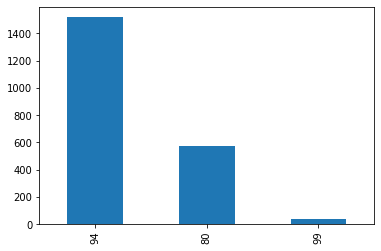

In [8]:
train_data['kf'].value_counts().plot(kind = 'bar')

In [9]:
print(train_data.groupby('kf').size().reset_index(name = 'count'))

   kf  count
0  80    573
1  94   1521
2  99     35


In [10]:
test_data.drop_duplicates(subset=['goods_nm'], inplace=True) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


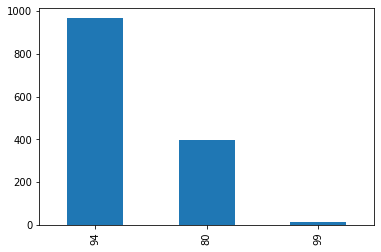

In [11]:
test_data['kf'].value_counts().plot(kind = 'bar')

In [12]:
print('총 샘플의 수 :',len(test_data))

총 샘플의 수 : 1383


In [13]:
print(train_data.isnull().values.any())

False


In [14]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [15]:
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
okt=Okt()
X_train = []
for sentence in train_data['goods_nm']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [17]:
print(X_train[:3])

[['웰', '클린', '황사', '방역', '마스크', 'KF', '94', '5', '매', '/', '성인', '/', '대형', '/', '일회용', '-', 'G', '마켓'], ['스마일', '황사', '미세먼지', '마스크', 'KF', '80', 'X', '30', '개', '(', '블랙', '/', '블랙', '+', '화이트', ')', '-', '롯데', 'ON'], ['쉼표', '리빙', '황사', '방역', '마스크', 'KF', '94', '그레이', '대형', '(', '1', '팩', '5', '매', ')', '-', '쿠팡']]


In [19]:
X_test = []
for sentence in test_data['goods_nm']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [20]:
print(X_test[:3])

[['(', '당일', '출고', ')', '코지', 'KF', '94', '마스크', '대형', '5', '매입', '블랙', '-', 'G', '마켓'], ['KF', '80', '오픈', '프리', '흰색', '대형', '마스크', '5', '매', '-', 'G', '마켓'], ['KF', '94', '대형', '마스크', '1', '개', '(', '5', '매', ')', 'x', '5', '개', '(', '총', '25', '매입', '),', '바이러스', ',', '황사', ',', '미세먼지', '-', '동백꽃', '상회']]


In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [22]:
print(tokenizer.word_index)

{'마스크': 1, 'kf': 2, '-': 3, '94': 4, '대형': 5, '황사': 6, '1': 7, '개': 8, '(': 9, '미세먼지': 10, ')': 11, '80': 12, '매': 13, '/': 14, '5': 15, '방역': 16, '포장': 17, '[': 18, ']': 19, '개별': 20, '매입': 21, '10': 22, '마켓': 23, '소형': 24, '일회용': 25, 'g': 26, '화이트': 27, '용': 28, '국내': 29, '11': 30, '번가': 31, '당일': 32, '국산': 33, '퓨어': 34, '코로나': 35, '쿠팡': 36, '네': 37, '옥션': 38, '3': 39, '발송': 40, ',': 41, '위메프': 42, '성': 43, '인용': 44, '어린이': 45, '블랙': 46, '개입': 47, '가드': 48, '티몬': 49, '식약처': 50, '출고': 51, '생산': 52, '몰다': 53, '랜덤': 54, '뉴': 55, '웰킵스': 56, '4': 57, '푸른': 58, '황': 59, 'x': 60, '중형': 61, '인증': 62, '대': 63, '사방': 64, '역용': 65, '차단': 66, '흰색': 67, '닥터': 68, '크다': 69, '퓨리': 70, '크리넥스': 71, '인터파크': 72, '먼지': 73, '필터': 74, '숨': 75, '배송': 76, '조': 77, '애니': 78, '더': 79, '초미세먼지': 80, '건강': 81, '케어': 82, '방한': 83, '2': 84, '더스논': 85, '늘': 86, '보건': 87, '형': 88, '조절': 89, '끈': 90, '파다': 91, '19': 92, '플러스': 93, '재고': 94, '파인텍': 95, '미세': 96, '프리': 97, '99': 98, '산': 99, '중': 100, '동아제약': 101, '스토어

In [25]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 1818
등장 빈도가 2번 이하인 희귀 단어의 수: 1028
단어 집합에서 희귀 단어의 비율: 56.54565456545655
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.6142286475175958


In [26]:
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 791


In [27]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [28]:
print(X_train[:3])

[[137, 185, 6, 16, 1, 2, 4, 15, 13, 14, 103, 14, 5, 14, 25, 3, 26, 23], [6, 10, 1, 2, 12, 60, 122, 8, 9, 46, 14, 46, 331, 27, 11, 3, 123, 206], [176, 138, 6, 16, 1, 2, 4, 207, 5, 9, 7, 134, 15, 13, 11, 3, 36]]


In [29]:
y_train = np.array(train_data['kf'])
y_test = np.array(test_data['kf'])

In [30]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]

In [31]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

2129
2129


In [46]:
X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)
print(len(X_test))
print(len(y_test))

1383
1383
[[  0   0   0 ...   3  26  23]
 [  0   0   0 ...   3 123 206]
 [  0   0   0 ...  11   3  36]
 ...
 [  0   0   0 ...  11   3  36]
 [  0   0   0 ...  94   3  38]
 [  0   0   0 ... 339 364 102]]
--------
[94 80 94 ... 94 94 94]


상품명의 최대 길이 : 42
상품명 평균 길이 : 16.6599342414279


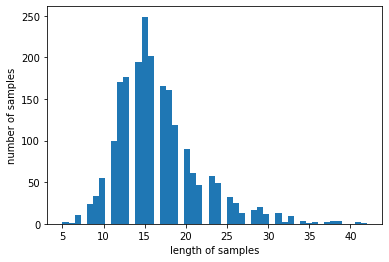

In [33]:
print('상품명의 최대 길이 :',max(len(l) for l in X_train))
print('상품명 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [34]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [35]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 98.07421324565524


In [36]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [50]:
yy_train=[]
yy_test=[]

for i in range(len(y_train)):
    if y_train[i]==99:
        yy_train.append([0,0,1])
    elif y_train[i]==94:
        yy_train.append([0,1,0])
    elif y_train[i]==80:
        yy_train.append([1,0,0])
        
for i in range(len(y_test)):
    if y_test[i]==99:
        yy_test.append([0,0,1])
    elif y_test[i]==94:
        yy_test.append([0,1,0])
    elif y_test[i]==80:
        yy_test.append([1,0,0])
        
yy_train=np.array(yy_train)
yy_test=np.array(yy_test)
        

In [37]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [72]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(3, activation='sigmoid'))

In [73]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [74]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, yy_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.1)

Train on 1916 samples, validate on 213 samples
Epoch 1/15
1800/1916 [===========================>..] - ETA: 0s - loss: 0.7158 - acc: 0.7078
Epoch 00001: val_acc improved from -inf to 0.70892, saving model to best_model.h5
1916/1916 [==============================] - 8s 4ms/sample - loss: 0.7147 - acc: 0.7062 - val_loss: 0.6634 - val_acc: 0.7089
Epoch 2/15
1860/1916 [============================>.] - ETA: 0s - loss: 0.5606 - acc: 0.7366
Epoch 00002: val_acc improved from 0.70892 to 0.92488, saving model to best_model.h5
1916/1916 [==============================] - 1s 758us/sample - loss: 0.5583 - acc: 0.7396 - val_loss: 0.3918 - val_acc: 0.9249
Epoch 3/15
1860/1916 [============================>.] - ETA: 0s - loss: 0.2337 - acc: 0.9339
Epoch 00003: val_acc improved from 0.92488 to 0.95305, saving model to best_model.h5
1916/1916 [==============================] - 1s 579us/sample - loss: 0.2316 - acc: 0.9348 - val_loss: 0.1329 - val_acc: 0.9531
Epoch 4/15
1860/1916 [=====================

In [75]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, yy_test)[1]))

1383/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


 테스트 정확도: 0.9870


In [76]:
predict = model.predict(X_test)


In [77]:
predict_labels = np.argmax(predict, axis=1) 
original_labels = np.argmax(yy_test, axis=1)

def return_kf(label):
    if label==1:
        return 94
    elif label==0:
        return 80
    elif label==2:
        return 99


In [78]:
print("못 맞춘 상품들 ")
print("==============================================================")
num=0
num_max=len(test_data)
for i in range(len(test_data)):
    if(original_labels[i]!=predict_labels[i]):
        num=num+1
        print("상품명 : ", test_data['goods_nm'].iloc[i], "/\t 원래 라벨 : ", return_kf(original_labels[i]), "/\t예측한 라벨 : ", return_kf(predict_labels[i]))
print("전체 상품 {}개 중 {} 개 예측 틀림".format(num_max,num))

못 맞춘 상품들 
상품명 :  초 미세먼지 마스크 - 하이가드 SF-80 / KF94 식약처인증 일동제약 푸른숲 황사마스크 /동아제약 더스논 파이브와이 우한 폐렴 바이러스 예방 - 세상의모든안전화 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  한국내제조 kf80 kf94 소형 대형 벌크 화이트 그레이 - 도그몰 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  KF80 미세먼지 방역 마스크 대형 1매(개별포장) - G마켓 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  테라브레스 뽀로로 kf80 - 다다모아샵 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  [쉼표리빙] 1개 - 5매입 KF94 쉼표리빙 미세먼지 황사 마스크 대형 일회용 KF80 ( 그레이) - 위메프 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  아미 코엔보 웰빙 황사 미세먼지 마스크 L KF80 - 웰빙다모아 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  황사방역마스크 KF94 KF80(대형 소형) - G마켓 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  황사 방역 미세먼지 항균바이러스 마스크 KF94/KF80/항균 - CARRYSOME /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  기타 하이가드 방역마스크 황사마스크 KF80 대형 검정색 1개 - 쿠팡 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  일회용마스크 성능회복 키트 12번사용 코로나 미세먼지황사 대형KF94 KF80 정전기필터 - 세젤 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  하이가드 황사마스크/KF80/KF94/1개/소형 /헬로키티/어린이 황사마스크 - 누리팜 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  하이가드 황사마스크 미세먼지 KF80일회용(성인블렉) - G마켓 /	 원래 라벨 :  80 /	예측한 라벨 :  9

In [81]:
## activation = softmax, optimizer = adam 으로 바꾸고 실행
model2 = Sequential()
model2.add(Embedding(vocab_size, 100))
model2.add(LSTM(128))
model2.add(Dense(3, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model2.fit(X_train, yy_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.1)

Train on 1916 samples, validate on 213 samples
Epoch 1/15
1800/1916 [===========================>..] - ETA: 0s - loss: 0.7739 - acc: 0.6972
Epoch 00001: val_acc did not improve from 0.98122
1916/1916 [==============================] - 7s 4ms/sample - loss: 0.7612 - acc: 0.7009 - val_loss: 0.5956 - val_acc: 0.7089
Epoch 2/15
1860/1916 [============================>.] - ETA: 0s - loss: 0.4368 - acc: 0.8054
Epoch 00002: val_acc did not improve from 0.98122
1916/1916 [==============================] - 1s 766us/sample - loss: 0.4318 - acc: 0.8095 - val_loss: 0.2650 - val_acc: 0.8920
Epoch 3/15
1860/1916 [============================>.] - ETA: 0s - loss: 0.1331 - acc: 0.9656
Epoch 00003: val_acc did not improve from 0.98122
1916/1916 [==============================] - 1s 543us/sample - loss: 0.1347 - acc: 0.9656 - val_loss: 0.1179 - val_acc: 0.9624
Epoch 4/15
1860/1916 [============================>.] - ETA: 0s - loss: 0.0779 - acc: 0.9726
Epoch 00004: val_acc did not improve from 0.98122
19

In [82]:
print("\n 테스트 정확도 : {:.2f}%".format(model2.evaluate(X_test,yy_test)[1]*100))

1383/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


 테스트 정확도 : 98.99%


In [83]:
predict2 = model2.predict(X_test)
predict_labels = np.argmax(predict2, axis=1) 
original_labels = np.argmax(yy_test, axis=1)
print("못 맞춘 상품들 ")
print("==============================================================")
num=0
num_max=len(test_data)
for i in range(len(test_data)):
    if(original_labels[i]!=predict_labels[i]):
        num=num+1
        print("상품명 : ", test_data['goods_nm'].iloc[i], "/\t 원래 라벨 : ", return_kf(original_labels[i]), "/\t예측한 라벨 : ", return_kf(predict_labels[i]))
print("전체 상품 {}개 중 {} 개 예측 틀림".format(num_max,num))

못 맞춘 상품들 
상품명 :  초 미세먼지 마스크 - 하이가드 SF-80 / KF94 식약처인증 일동제약 푸른숲 황사마스크 /동아제약 더스논 파이브와이 우한 폐렴 바이러스 예방 - 세상의모든안전화 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  한국내제조 kf80 kf94 소형 대형 벌크 화이트 그레이 - 도그몰 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  테라브레스 뽀로로 kf80 - 다다모아샵 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  [쉼표리빙] 1개 - 5매입 KF94 쉼표리빙 미세먼지 황사 마스크 대형 일회용 KF80 ( 그레이) - 위메프 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  아미 코엔보 웰빙 황사 미세먼지 마스크 L KF80 - 웰빙다모아 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  황사방역마스크 KF94 KF80(대형 소형) - G마켓 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  황사 방역 미세먼지 항균바이러스 마스크 KF94/KF80/항균 - CARRYSOME /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  일회용마스크 성능회복 키트 12번사용 코로나 미세먼지황사 대형KF94 KF80 정전기필터 - 세젤 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  하이가드 황사마스크/KF80/KF94/1개/소형 /헬로키티/어린이 황사마스크 - 누리팜 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  유한킴벌리 미세먼지 방진마스크,황사 마스크 KF80,9-크린가드 황사마스크 KF94 (소형/대형)-1개 - 인터파크 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  KF94 방역마스크 올가드/ 초미세 먼지 황사 / 감염원 차단 /소형 중형 대형 - 야음마켓1974 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  프리데이 [KF94] 황사 미세먼